In [ ]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from keras import optimizers

In [ ]:
# y = 0.2x^4 + 2x^3 + 0.1x^2 + 10
def func(x):
    return 0.2 * x ** 4 + 2 * x ** 3 + 0.1 * x ** 2 + 10

# Generate Sample Data and Shuffle

In [ ]:
def generate_samples(num_samples, shuffle = True):
  samples = []
  step_size = 2 / (num_samples-1) # calculate the step size between x values ((x1-x2)/(num_samples-1))
  x = -1 #starts x at -1
  for i in range(num_samples):
    y = func(x) # calculate the corresponding y value using the given function
    samples.append((x, y)) # add the (x, y) pair to the list of samples
    x += step_size #increment x by stepsize

  if shuffle:
    samples = np.array(samples)
    perm = np.random.permutation(num_samples)
    samples = samples[perm]

  return samples

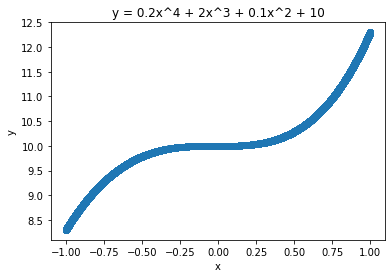

In [ ]:
dataset_shuffled = generate_samples(30000)
dataset_not_shuffled = generate_samples(30000, False)
#generate dataframe
dataset_df = pd.DataFrame(dataset_shuffled, columns=["x", "y"])

x_vals = dataset_df['x'].to_numpy()
y_vals = dataset_df['y'].to_numpy()

#plot function
plt.scatter(x_vals, y_vals)
plt.ylabel('y')
plt.xlabel('x')
plt.title('y = 0.2x^4 + 2x^3 + 0.1x^2 + 10')
plt.show()

# Train, Validate, and Test Splits for Dataset

In [ ]:
def train_validate_test_split(X, y, train, validate, test):
  # calculate the number of samples in each set
  n = len(X)
  n_train = int(n * train)
  n_val = int(n * validate)
  n_test = n - n_train - n_val

  # split the dataset into the three sets
  X_train = X[:n_train]
  y_train = y[:n_train]
  X_val = X[n_train:n_train+n_val]
  y_val = y[n_train:n_train+n_val]
  X_test = X[n_train+n_val:]
  y_test = y[n_train+n_val:]


  return X_train, X_val, X_test, y_train, y_val, y_test

In [ ]:
X_train, X_val, X_test, y_train, y_val, y_test = train_validate_test_split (x_vals, y_vals, 0.3, 0.2, 0.5)

print(y_train.shape, y_val.shape, y_test.shape)


(9000,) (6000,) (15000,)


# Scaling the Dataset

In [ ]:
def scale_data(X_train, X_val, X_test, y_train, y_val, y_test):
  scaler = MinMaxScaler()
  X_train = scaler.fit_transform(X_train.reshape(-1, 1)).flatten()
  X_val = scaler.fit_transform(X_val.reshape(-1, 1)).flatten()
  X_test = scaler.fit_transform(X_test.reshape(-1, 1)).flatten()
  y_train = scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
  y_val = scaler.fit_transform(y_val.reshape(-1, 1)).flatten()
  y_test = scaler.fit_transform(y_test.reshape(-1, 1)).flatten()

  return X_train, X_val, X_test, y_train, y_val, y_test

# MAE, RMSE, and R2 Metrics

In [ ]:
def evaluate_metrics(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual, predicted)
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("R2 Score:", r2)

# Neural Network Structures and Models

In [ ]:
# define structure 1
tf.compat.v1.reset_default_graph() 
model1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,), name = 'x'),
    tf.keras.layers.Dense(units = 12, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units = 8, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units = 4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units = 1, name = 'y')
])

model1.summary()

model2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,), name = 'x'),
    tf.keras.layers.Dense(units = 12, activation=tf.keras.activations.tanh),
    tf.keras.layers.Dense(units = 8, activation=tf.keras.activations.tanh),
    tf.keras.layers.Dense(units = 4, activation=tf.keras.activations.tanh),
    tf.keras.layers.Dense(units = 1, name = 'y')
])

model2.summary()

model3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,), name = 'x'),
    tf.keras.layers.Dense(units = 24, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units = 1, name = 'y')
])

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                24        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 y (Dense)                   (None, 1)                 5         
                                                                 
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 

In [ ]:
def compile_fit_model(model, x_train, y_train):
  model.compile(loss=tf.keras.losses.MeanSquaredError(),
            optimizer='adam')

  # fit model
  batch_size = 12
  epochs = 20
  model.fit(
        x_train, y_train, batch_size=batch_size, epochs=epochs
  )

  return model

def show_graphs(x_test, y_test, y_pred):
  #plot function
  plt.scatter(x_test, y_test)
  plt.ylabel('y')
  plt.xlabel('x')
  plt.title('Actual Values')
  plt.show()

  #plot function
  plt.scatter(x_test, y_pred)
  plt.ylabel('y')
  plt.xlabel('x')
  plt.title('Predicted Values')
  plt.show()

## Case 1


Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 34.4852
Epoch 2/20
750/750 [==============================] - 2s 2ms/step - loss: 0.1115
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0484
Epoch 4/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0234
Epoch 5/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0113
Epoch 6/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0055
Epoch 7/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0029
Epoch 8/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0017
Epoch 9/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0011
Epoch 10/20
750/750 [==============================] - 1s 2ms/step - loss: 8.4307e-04
Epoch 11/20
750/750 [==============================] - 1s 2ms/step - loss: 6.9407e-04
Epoch 12/20
750/750 [==============================] - 2s 2ms/step - loss: 6.4288e-04
Epoch 13/20

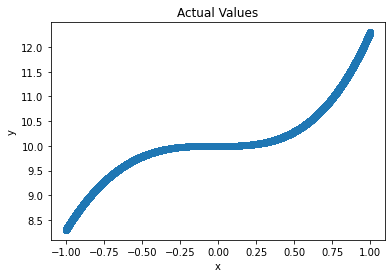

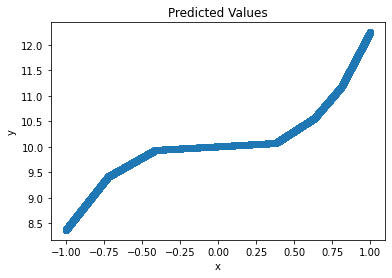

Mean Absolute Error (MAE): 10.073483
Mean Squared Error (MSE): 101.58166
Root Mean Squared Error (RMSE): 10.078773
R2 Score: -311.1648403333153


In [ ]:
# generate shuffled samples
dataset = generate_samples(30000)

#generate dataframe
dataset_df = pd.DataFrame(dataset_shuffled, columns=["x", "y"])
x_vals = dataset_df['x'].to_numpy()
x_vals = x_vals.astype('float32')
y_vals = dataset_df['y'].to_numpy()
y_vals = y_vals.astype('float32')

print()
# get splits
X_train, X_val, X_test, y_train, y_val, y_test = train_validate_test_split (x_vals, y_vals, 0.3, 0.2, 0.5)

# compile and train model
model = compile_fit_model(model1, X_train, y_train)

# get metrics and graph
y_pred = model.predict(X_test)
y_val = model.predict(X_val)
show_graphs(X_test, y_test, y_pred)
evaluate_metrics(X_val, y_val)

## Case 2


Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 32.5316
Epoch 2/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0588
Epoch 3/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0478
Epoch 4/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0434
Epoch 5/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0418
Epoch 6/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0385
Epoch 7/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0310
Epoch 8/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0203
Epoch 9/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0115
Epoch 10/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0067
Epoch 11/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0043
Epoch 12/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0030
Epoch 13/20
750/750 [==

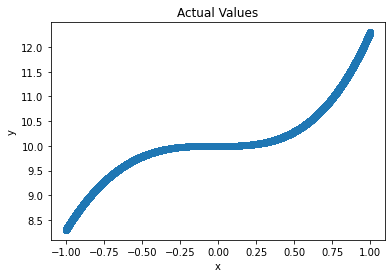

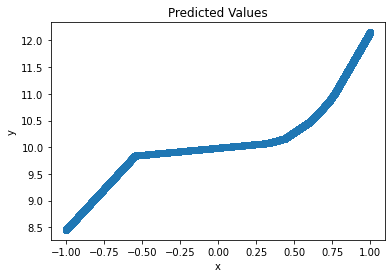

Mean Absolute Error (MAE): 10.0581665
Mean Squared Error (MSE): 101.26854
Root Mean Squared Error (RMSE): 10.063227
R2 Score: -310.2026425526128


In [ ]:
# generate shuffled samples
dataset = generate_samples(30000)

#generate dataframe
dataset_df = pd.DataFrame(dataset_shuffled, columns=["x", "y"])
x_vals = dataset_df['x'].to_numpy()
x_vals = x_vals.astype('float32')
y_vals = dataset_df['y'].to_numpy()
y_vals = y_vals.astype('float32')

print()
# get splits
X_train, X_val, X_test, y_train, y_val, y_test = train_validate_test_split (x_vals, y_vals, 0.3, 0.2, 0.5)

# compile and train model
model = compile_fit_model(model3, X_train, y_train)

# get metrics and graphs
y_pred = model.predict(X_test)
y_val = model.predict(X_val)
show_graphs(X_test, y_test, y_pred)
evaluate_metrics(X_val, y_val)

## Case 3


Epoch 1/20
750/750 [==============================] - 3s 3ms/step - loss: 34.5140
Epoch 2/20
750/750 [==============================] - 1s 2ms/step - loss: 5.7708
Epoch 3/20
750/750 [==============================] - 1s 2ms/step - loss: 1.1118
Epoch 4/20
750/750 [==============================] - 1s 2ms/step - loss: 0.5912
Epoch 5/20
750/750 [==============================] - 1s 2ms/step - loss: 0.4421
Epoch 6/20
750/750 [==============================] - 2s 2ms/step - loss: 0.2378
Epoch 7/20
750/750 [==============================] - 2s 2ms/step - loss: 0.1766
Epoch 8/20
750/750 [==============================] - 1s 2ms/step - loss: 0.1276
Epoch 9/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0484
Epoch 10/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0192
Epoch 11/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0087
Epoch 12/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0040
Epoch 13/20
750/750 [==

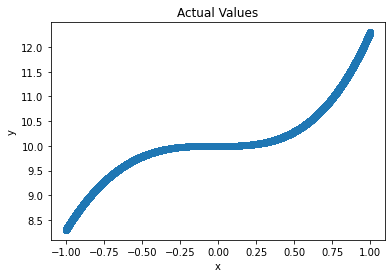

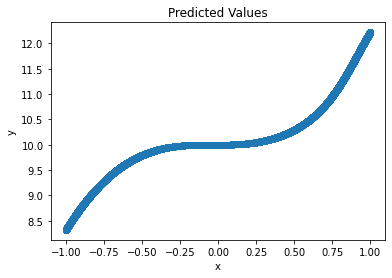

Mean Absolute Error (MAE): 10.072193
Mean Squared Error (MSE): 101.55504
Root Mean Squared Error (RMSE): 10.077452
R2 Score: -311.0830579088357


In [ ]:
# generate shuffled samples
dataset = generate_samples(30000)

#generate dataframe
dataset_df = pd.DataFrame(dataset_shuffled, columns=["x", "y"])
x_vals = dataset_df['x'].to_numpy()
x_vals = x_vals.astype('float32')
y_vals = dataset_df['y'].to_numpy()
y_vals = y_vals.astype('float32')

print()
# get splits
X_train, X_val, X_test, y_train, y_val, y_test = train_validate_test_split (x_vals, y_vals, 0.3, 0.2, 0.5)

# compile and train model
model = compile_fit_model(model2, X_train, y_train)

# get metrics and graphs
y_pred = model.predict(X_test)
y_val = model.predict(X_val)
show_graphs(X_test, y_test, y_pred)
evaluate_metrics(X_val, y_val)

## Case 4

Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 14.7472
Epoch 2/20
750/750 [==============================] - 2s 2ms/step - loss: 0.3370
Epoch 3/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0514
Epoch 4/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0312
Epoch 5/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0174
Epoch 6/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0102
Epoch 7/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0078
Epoch 8/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0062
Epoch 9/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0049
Epoch 10/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0041
Epoch 11/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0036
Epoch 12/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0032
Epoch 13/20
750/750 [===

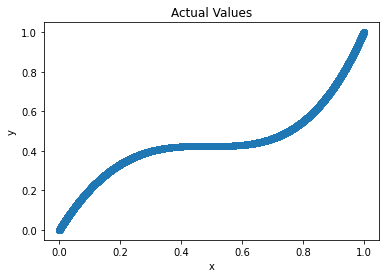

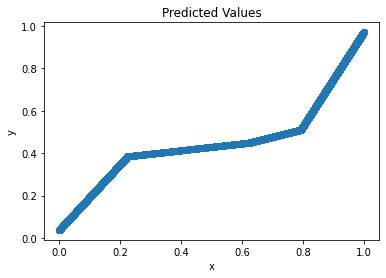

Mean Absolute Error (MAE): 0.12827523
Mean Squared Error (MSE): 0.021945586
Root Mean Squared Error (RMSE): 0.14814043
R2 Score: 0.7305107455678946


In [ ]:
# generate shuffled samples
dataset = generate_samples(30000)

#generate dataframe
dataset_df = pd.DataFrame(dataset_shuffled, columns=["x", "y"])
x_vals = dataset_df['x'].to_numpy()
x_vals = x_vals.astype('float32')
y_vals = dataset_df['y'].to_numpy()
y_vals = y_vals.astype('float32')

# get splits
X_train, X_val, X_test, y_train, y_val, y_test = train_validate_test_split (x_vals, y_vals, 0.3, 0.2, 0.5)

X_train, X_val, X_test, y_train, y_val, y_test = scale_data(X_train, X_val, X_test, y_train, y_val, y_test)

# compile and train model
model = compile_fit_model(model1, X_train, y_train)

# get metrics and graph
y_pred = model.predict(X_test)
y_val = model.predict(X_val)
show_graphs(X_test, y_test, y_pred)
evaluate_metrics(X_val, y_val)

## Case 5

Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 7.1598
Epoch 2/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0028
Epoch 3/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0022
Epoch 4/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0020
Epoch 5/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0017
Epoch 6/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0015
Epoch 7/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0011
Epoch 8/20
750/750 [==============================] - 2s 2ms/step - loss: 8.0133e-04
Epoch 9/20
750/750 [==============================] - 1s 2ms/step - loss: 5.4408e-04
Epoch 10/20
750/750 [==============================] - 1s 2ms/step - loss: 4.4940e-04
Epoch 11/20
750/750 [==============================] - 1s 2ms/step - loss: 3.7378e-04
Epoch 12/20
750/750 [==============================] - 1s 2ms/step - loss: 3.0131e-04
Epoch

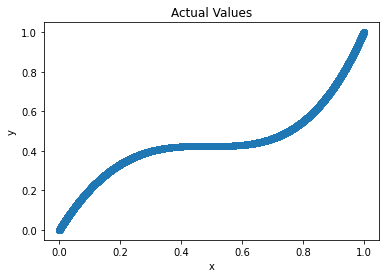

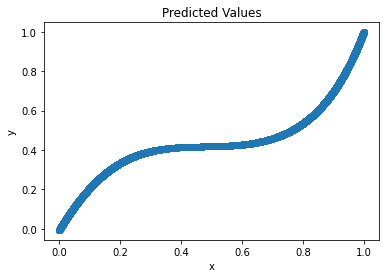

Mean Absolute Error (MAE): 0.1367018
Mean Squared Error (MSE): 0.025159974
Root Mean Squared Error (RMSE): 0.15861896
R2 Score: 0.6910384863547965


In [ ]:
# generate shuffled samples
dataset = generate_samples(30000)

#generate dataframe
dataset_df = pd.DataFrame(dataset_shuffled, columns=["x", "y"])
x_vals = dataset_df['x'].to_numpy()
x_vals = x_vals.astype('float32')
y_vals = dataset_df['y'].to_numpy()
y_vals = y_vals.astype('float32')

# get splits
X_train, X_val, X_test, y_train, y_val, y_test = train_validate_test_split (x_vals, y_vals, 0.3, 0.2, 0.5)

X_train, X_val, X_test, y_train, y_val, y_test = scale_data(X_train, X_val, X_test, y_train, y_val, y_test)

# compile and train model
model = compile_fit_model(model2, X_train, y_train)

# get metrics and graph
y_pred = model.predict(X_test)
y_val = model.predict(X_val)
show_graphs(X_test, y_test, y_pred)
evaluate_metrics(X_val, y_val)

# Manual Neural Network

In [ ]:
# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Define the input and output data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Initialize the layers and the weights randomly
np.random.seed(1)
weights_1 = 2 * np.random.random((2, 4)) - 1
weights_2 = 2 * np.random.random((4, 1)) - 1

print("Shapes:\n","Input:", X.shape, "Hidden Layer1:", weights_1.shape, "Hidden Layer2:",weights_2.shape)
# Train the neural network
for i in range(50000):

    # Forward propagation
    layer_1 = sigmoid(np.dot(X, weights_1))
    layer_2 = sigmoid(np.dot(layer_1, weights_2))

    # Calculate the error
    error = y - layer_2

    # Backward propagation
    delta_2 = error * sigmoid_derivative(layer_2)
    delta_1 = delta_2.dot(weights_2.T) * sigmoid_derivative(layer_1)

    # Update the weights
    weights_2 += layer_1.T.dot(delta_2)
    weights_1 += X.T.dot(delta_1)

# Test the neural network i.e. forward propagate
output = sigmoid(np.dot(sigmoid(np.dot(X, weights_1)), weights_2))
print(weights_1)
print(weights_2)

print(f'>>>Output:\n{output}')

Shapes:
 Input: (4, 2) Hidden Layer1: (2, 4) Hidden Layer2: (4, 1)
[[ 3.13526159  4.07849993 -6.07575203 -7.56936407]
 [-1.34653935 -8.28619635 -5.94801059  3.516715  ]]
[[ -6.16572535]
 [ 10.96135323]
 [-20.76380586]
 [  6.53460121]]
>>>Output:
[[0.00886457]
 [0.99345181]
 [0.99204399]
 [0.00662401]]
